In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [238]:
# %cd /content/drive/MyDrive/yourProjectdirectory

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import learning_curve    





In [133]:

# ! pip3 install catboost
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


In [134]:
# from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve



In [135]:
from itertools import combinations


In [136]:
# !pip install hyperopt
# Hyperopt: Distributed Asynchronous Hyper-parameter Optimization
from hyperopt import hp
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, Trials


In [137]:
df= pd.read_csv("Fish.csv")

# EDA

In [138]:
df.shape

(159, 7)

In [139]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [140]:
df.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [141]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [142]:
df.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [143]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [144]:
df.nunique()

Species      7
Weight     101
Length1    116
Length2     93
Length3    124
Height     154
Width      152
dtype: int64

In [145]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [147]:
count = df.Species.value_counts()
spe = pd.DataFrame(dict(Frequency = count))
spe

,Frequency
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


In [148]:
fig = px.bar(spe)
fig.update_layout(
    autosize=False,
    width=600,
    height=500,
    )
fig.show()


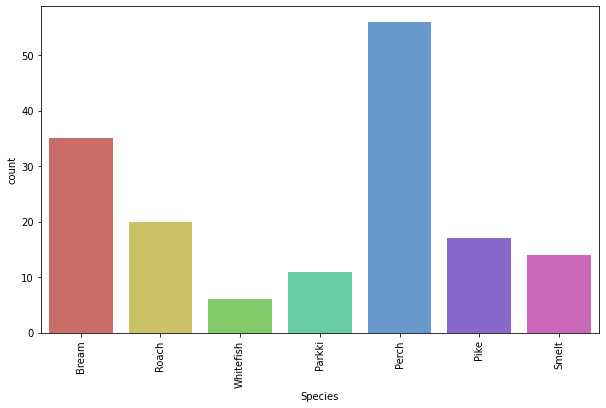

In [237]:
plt.figure(figsize=(10,6))
sns.countplot("Species",data=df,palette="hls")
plt.xticks(rotation=90)

plt.show()

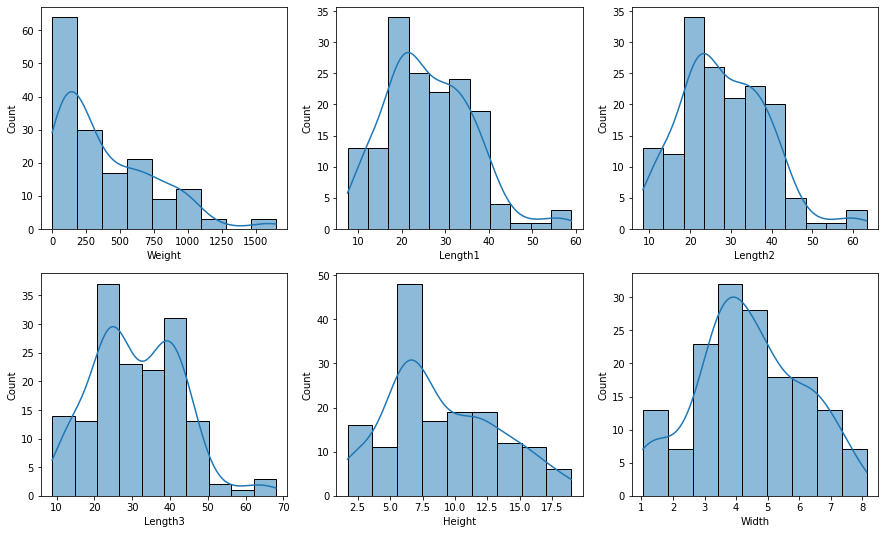

In [150]:

cols = ['Weight', 'Length1', 'Length2', 'Length3', 'Height','Width']
fig,ax = plt.subplots(2,3,figsize = (15,9))
for i in range(len(cols)):
  r = i//3
  c = i%3
  cn = cols[i]
  # ax[r,c].hist(df[cn])
  sns.histplot(df[cn],ax=ax[r,c],kde = True)
fig.show()





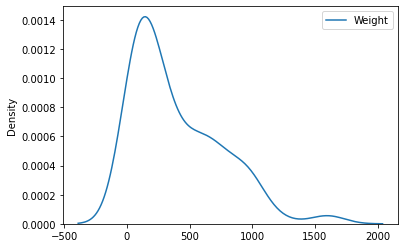

In [151]:

sns.kdeplot(data=df[['Weight']])
plt.show()

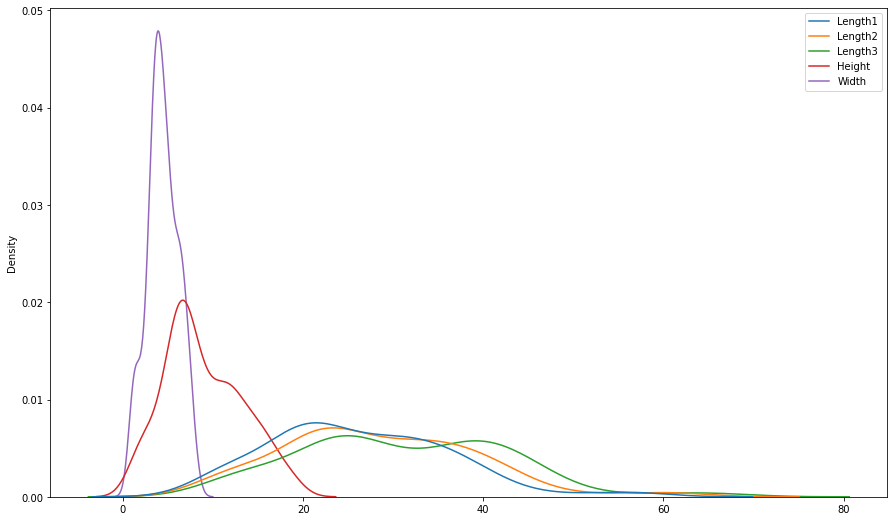

In [152]:
plt.figure( figsize=(15,9))
sns.kdeplot(data=df[['Length1', 'Length2', 'Length3', 'Height','Width']], )
plt.show()


In [153]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


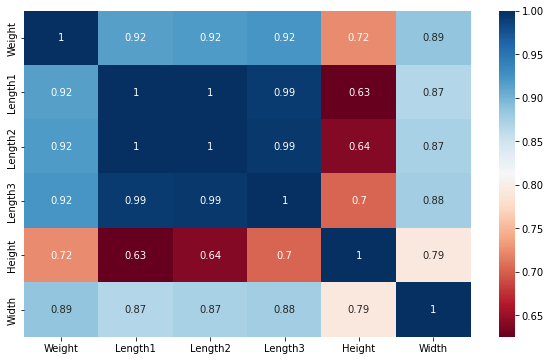

In [233]:
plt.figure(figsize=(10,6))

sns.heatmap(df.corr(),annot=True,cmap="RdBu")
plt.show()

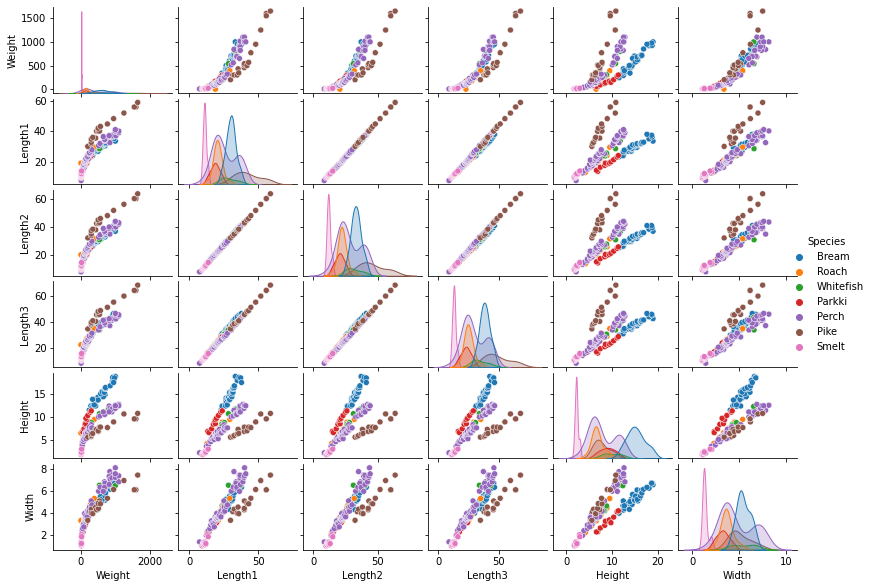

In [155]:
g = sns.pairplot(df,hue="Species")
g.fig.set_figheight(8)
g.fig.set_figwidth(12)
plt.show()



## In descriptive statistics, a box plot or boxplot (also known as box and whisker plot) 
is a type of chart often used in explanatory data analysis. 
- Box plots visually show the distribution of numerical data 
and skewness through displaying the data quartiles (or percentiles) and averages.
<center>
<img src="https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png" width="600">

- Read [here](https://www.simplypsychology.org/boxplots.html#:~:text=In%20descriptive%20statistics%2C%20a%20box,(or%20percentiles)%20and%20averages.) , [here](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51) and [here](https://www.whatissixsigma.net/box-plot-diagram-to-identify-outliers/#:~:text=As%20per%20the%20basic%20standards,or%20below%20the%20first%20quartile.) for better  understanding.  



</center>


---




In [192]:


# fig,ax = plt.subplots(2,3,figsize = (15,8))
# for i in range(len(cols)):
#   r = i//3
#   c = i%3
#   cn = cols[i]
#   sns.boxplot(df[cn],ax=ax[r,c],palette='Accent')
# plt.show()


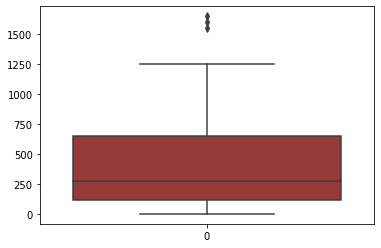

In [194]:
ax = sns.boxplot( data=df.Weight,color="BROWN")

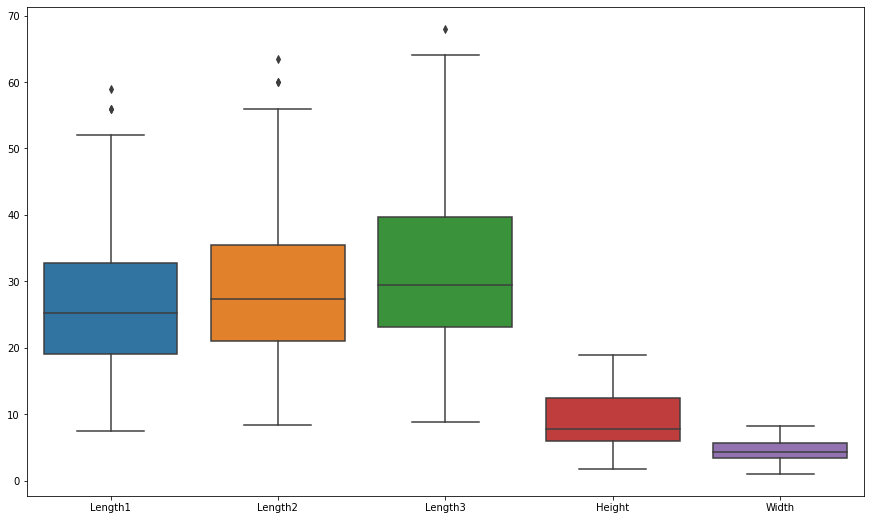

In [158]:
plt.figure(figsize=(15,9))
ax = sns.boxplot( data=df[['Length1', 'Length2', 'Length3', 'Height','Width']])

In [159]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


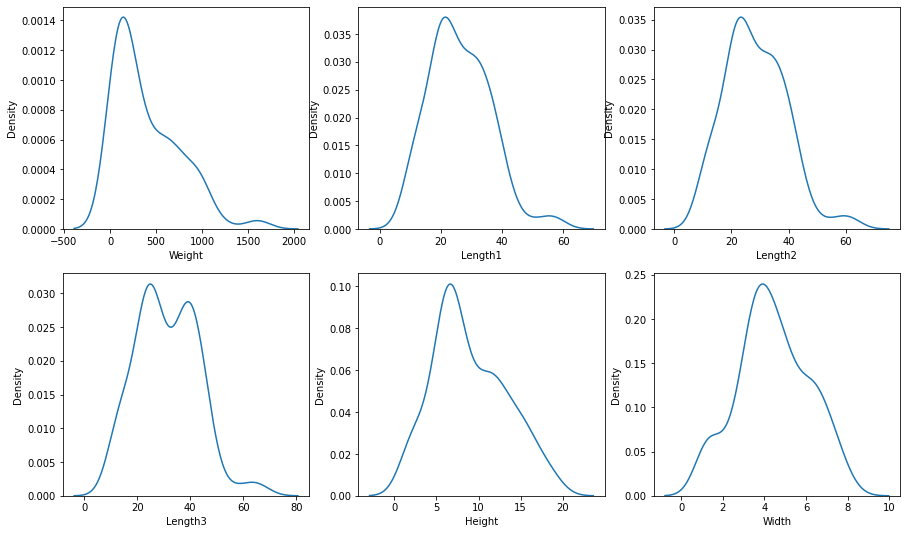

In [241]:

cols = ['Weight', 'Length1', 'Length2', 'Length3', 'Height','Width']
fig,ax = plt.subplots(2,3,figsize = (15,9))
for i in range(len(cols)):
  r = i//3
  c = i%3
  cn = cols[i]
  # ax[r,c].hist(df[cn])
  sns.kdeplot(df[cn],ax=ax[r,c])
fig.show()

In [161]:
# remove outlier from the dataset
def spot_outliers(col):
  Q3 = col.quantile(0.75)
  Q1 = col.quantile(0.25)
  IQR = Q3-Q1
  lower_limit = Q1 -(1.5*IQR)
  upper_limit = Q3 + (1.5 *IQR)
  col_outliers = col[(col<lower_limit)|(col>upper_limit)]
  return  col_outliers






**Why “1.5” in IQR Method of Outlier Detection? read [here](https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097#:~:text=Well%2C%20as%20you%20might%20have,perceived%20as%20outlier(s).)**




In [162]:
for col in cols:
  print(col)
  print("_____________________________")
  print(spot_outliers(df[col]))
  print("_____________________________")


Weight
_____________________________
142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64
_____________________________
Length1
_____________________________
142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64
_____________________________
Length2
_____________________________
142    60.0
143    60.0
144    63.4
Name: Length2, dtype: float64
_____________________________
Length3
_____________________________
144    68.0
Name: Length3, dtype: float64
_____________________________
Height
_____________________________
Series([], Name: Height, dtype: float64)
_____________________________
Width
_____________________________
Series([], Name: Width, dtype: float64)
_____________________________


In [163]:
df[142:145]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [249]:
df_new = df.drop([142,143,144])

In [250]:
print(df.shape)
print(df_new.shape)

(159, 7)
(156, 7)


# Data preprocessing 

- Stanardization is a type of scaling that involves centering the distribution of the data on the value 0 and the standard deviation to the value 1. The formula for standardization is found  below:-





$$ z = \frac{x_{i} - \mu_{}}{\sigma_{}}$$

- When the distribution of your data follows a Gaussian distribution then Standardization is a good option.

In [252]:
features = [ 'Length1', 'Length2', 'Length3', 'Height','Width']
target = ['Weight']
scaler1 = StandardScaler()
scaler2 = StandardScaler()

In [253]:
df_new.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,375.217308,25.655769,27.786538,30.571154,8.951128,4.375719
std,319.546978,9.119630,9.792651,10.695359,4.324325,1.672188
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.000000,21.000000,23.025000,5.931675,3.369600
50%,271.000000,25.000000,26.750000,29.250000,7.647800,4.243300
75%,612.500000,32.125000,35.000000,39.425000,12.378550,5.424375
max,1250.000000,52.000000,56.000000,59.700000,18.957000,8.142000


In [254]:
df_new[features] = scaler1.fit_transform(df_new[features])
df_new[target] = scaler1.fit_transform(df_new[target])

In [255]:
df_new.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02
mean,-5.693451e-17,1.281027e-17,-4.896368e-16,-2.049643e-16,1.366428e-16,1.480297e-16
std,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00
min,-1.177998e+00,-1.997257e+00,-1.986079e+00,-2.042126e+00,-1.675635e+00,-1.996688e+00
25%,-8.012570e-01,-7.321794e-01,-6.952556e-01,-7.078263e-01,-7.004973e-01,-6.036162e-01
50%,-3.271912e-01,-7.213903e-02,-1.061895e-01,-1.239237e-01,-3.023653e-01,-7.944425e-02
75%,7.449512e-01,7.116589e-01,7.389923e-01,8.304874e-01,7.951438e-01,6.291357e-01
max,2.746388e+00,2.898043e+00,2.890364e+00,2.732275e+00,2.321310e+00,2.259561e+00


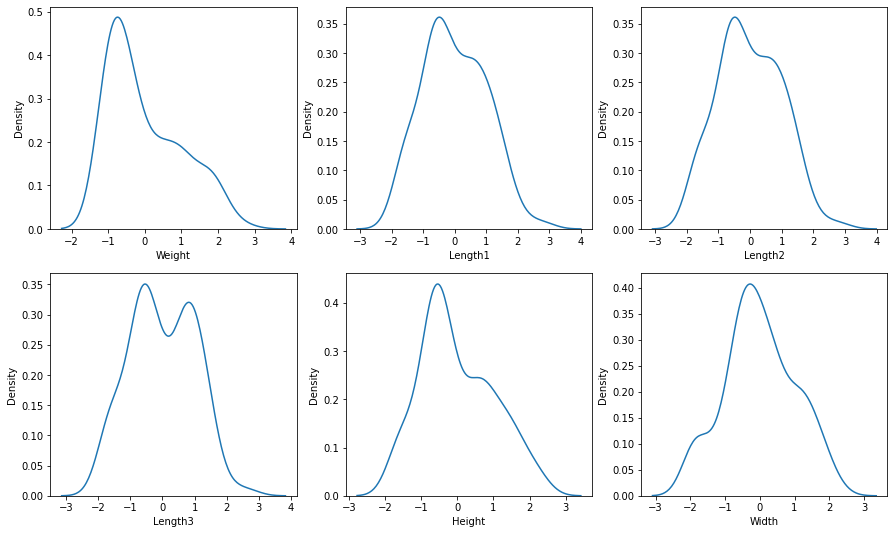

In [257]:
cols = ['Weight', 'Length1', 'Length2', 'Length3', 'Height','Width']

fig,ax = plt.subplots(2,3,figsize = (15,9))
for i in range(len(cols)):
  r = i//3
  c = i%3
  cn = cols[i]
  sns.kdeplot(df_new[cn],ax=ax[r,c])
fig.show()

In [258]:
# define input and output of the mode
X = df_new.drop("Weight",axis = 1)
X.shape

(156, 6)

In [259]:
Y = df_new["Weight"]
Y.shape

(156,)

In [260]:
# split the data to train test set
x_train , x_test , y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [261]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 6)
(32, 6)
(124,)
(32,)


In [262]:
# Encode target labels with value between 0 and n_classes-1.
label_encoder = LabelEncoder()

In [263]:
x_train["Species"]= label_encoder.fit_transform(x_train["Species"].values)
x_test["Species"] = label_encoder.fit_transform(x_test["Species"].values)

In [264]:
label_encoder.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [265]:
label_encoder.transform(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'])

array([0, 1, 2, 3, 4, 5, 6])

In [266]:
list(label_encoder.inverse_transform([0, 1, 2, 3, 4, 5, 6]))

['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish']

# Model Tranning

In [267]:
def eval_metrics(y_pred , y_act):
  mse = round(mean_squared_error(y_pred,y_act),2)
  mae = round(mean_absolute_error(y_pred,y_act),2)
  r_squared = round(r2_score(y_pred,y_act),2)
  return mse,mae,r_squared

In [268]:
from pandas.core.common import random_state
def models_evaluation(model,train_data,val_data,y_val,y_act):
  models = ["Linear_regression","Decission_Tree","Random_Forest",
            "XGboots_Regressor","LGBM_Regressor","CatBoost_Regressor",
            "SGD_Regressor","Kernel_Ridge","Elastic_Net","Bayesian_Ridge",
            "GradientBoosting_Regressor","SVR"]
  # call the models 
  if model == "Linear_regression":
    reg = LinearRegression()
  elif model =="Decission_Tree":
    reg = DecisionTreeRegressor(random_state=42)
  elif model == "Randoem_Forest":
    reg = RandomForestRegressor(random_state=42)
  elif model == "XGboots_Regressor":
     reg = xgb.XGBRegressor(objective="reg:squarederror",random_state = 42)
  elif  model == "LGBM_Regressor":
    reg = LGBMRegressor(random_state=42)
  elif model=="CatBoost_Regressor":
    reg= CatBoostRegressor(random_state=42)
  elif model == "SGD_Regressor":
     reg = SGDRegressor(random_state=42)
  elif model == "Kernel_Ridge" :
    reg = KernelRidge()
  elif model == "Elastic_Net":
    reg = ElasticNet(random_state=42)
  elif model=="Bayesian_Ridge":
    reg = BayesianRidge()
  elif model == "GradientBoosting_Regressor":
    reg = GradientBoostingRegressor(random_state=42)
  else:
    reg = SVR()

  # fiting the models 
  if model in models:
    reg.fit(train_data,y_train)
    pred = reg.predict(val_data)
    mse,mae,r_squared = eval_metrics(pred,y_test)
    return  mse,mae,r_squared


In [269]:
models = ["Linear_regression","Decission_Tree","Random_Forest",
            "XGboots_Regressor","LGBM_Regressor","CatBoost_Regressor",
            "SGD_Regressor","Kernel_Ridge","Elastic_Net","Bayesian_Ridge",
            "GradientBoosting_Regressor","SVR"]

results = []
for model in models:
  res = models_evaluation(model,x_train,x_test,y_train,y_test)
  results.append((model,res[0],res[1],res[2]))
  print(model,res)



In [270]:
df_metrices = pd.DataFrame(results,columns=["model","MSE","MAE","R_squred"])

In [271]:

df_metrices

,model,MSE,MAE,R_squred
0,Linear_regression,0.08,0.23,0.89
1,Decission_Tree,0.05,0.16,0.94
2,Random_Forest,0.02,0.09,0.98
3,XGboots_Regressor,0.03,0.13,0.96
4,LGBM_Regressor,0.03,0.12,0.97
5,CatBoost_Regressor,0.03,0.10,0.97
6,SGD_Regressor,0.10,0.26,0.86
7,Kernel_Ridge,0.10,0.26,0.86
8,Elastic_Net,0.52,0.62,-3.87
9,Bayesian_Ridge,0.08,0.23,0.89


## Plotting Learning [Curves](https://scikit-learn.org/stable/modules/learning_curve.html) and [Here](https://thedatascientist.com/learning-curves-scikit-learn/)

- A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. 


In [272]:
def learning_curves(model):
    train_sizes, train_scores, valid_scores = learning_curve(model(),x_train,y_train)
    print(train_sizes)
    plt.figure(figsize=(9,5))
    plt.plot(train_sizes,np.mean(train_scores,axis=1),label = "Train")
    plt.plot(train_sizes,np.mean(valid_scores,axis = 1),label = "Val")
    plt.xlabel("Data size")
    plt.ylabel("Score")
    plt.legend()
    plt.show()


[ 9 32 54 76 99]


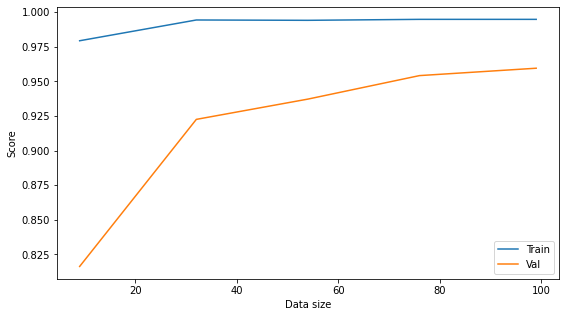

In [273]:
learning_curves(RandomForestRegressor)

[ 9 32 54 76 99]


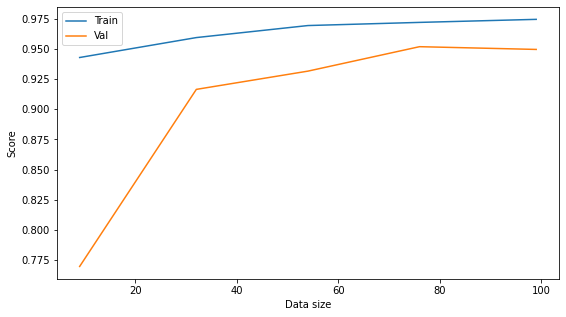

In [274]:
learning_curves(SVR)

In [318]:
model = RandomForestRegressor(random_state=42)
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [319]:
y_pred =model.predict(x_test)


In [320]:
res = pd.DataFrame(dict(y_actual = y_test ,y_pred =y_pred))

In [321]:
res

,y_actual,y_pred
96,-0.471609,-0.647107
69,-0.550096,-0.665254
82,-0.832652,-0.798526
76,-0.958232,-0.918047
114,1.019658,0.982832
29,1.961511,1.519342
94,-0.707072,-0.742799
132,0.171991,-0.043191
93,-0.722769,-0.748482
139,1.239424,1.212738
